In [1]:
# Import necessary libraries
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Print the shapes of the data
print(f"X Train data shape: {x_train.shape}")
print(f"X Test data shape: {x_test.shape}")
print(f"Y Train labels shape: {y_train.shape}")
print(f"Y Test labels shape: {y_test.shape}")

X Train data shape: (50000, 32, 32, 3)
X Test data shape: (10000, 32, 32, 3)
Y Train labels shape: (50000, 1)
Y Test labels shape: (10000, 1)


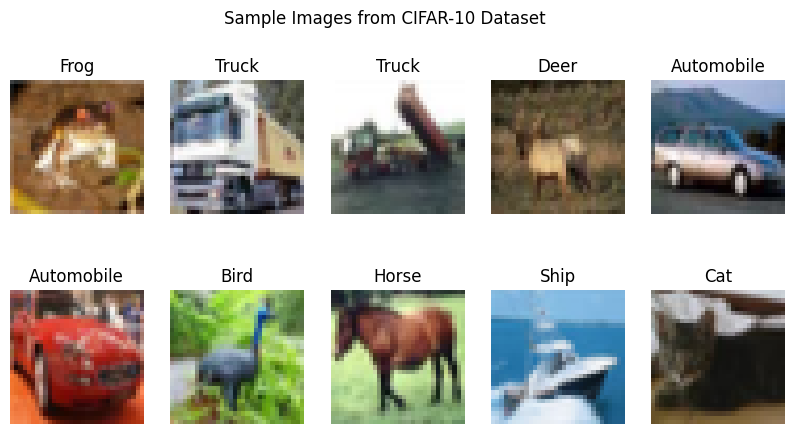

In [4]:
# Define the CIFAR-10 class names
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

# Plot a few sample images with their labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(class_names[y_train[i][0]])
plt.suptitle("Sample Images from CIFAR-10 Dataset")
plt.show()


In [5]:
# Convert the pixel values from integers to floats and normalize to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
# One-hot encode the labels for 10 classes
y_train = to_categorical(y_train, num_classes = len(class_names))
y_test = to_categorical(y_test, num_classes = len(class_names))

In [7]:
# Verify data shapes and types after preprocessing
print(f"x_train shape: {x_train.shape} ----- dtype: {x_train.dtype}")
print(f"x_test shape: {x_test.shape} ----- dtype: {x_test.dtype}")
print(f"y_train shape: {y_train.shape} ----- dtype: {y_train.dtype}")
print(f"y_test shape: {y_test.shape} ----- dtype: {y_test.dtype}")


x_train shape: (50000, 32, 32, 3) ----- dtype: float32
x_test shape: (10000, 32, 32, 3) ----- dtype: float32
y_train shape: (50000, 10) ----- dtype: float64
y_test shape: (10000, 10) ----- dtype: float64


In [8]:

# Adjust filter sizes for CIFAR
filters = [64, 128, 256, 512]
img_rows, img_cols, channels = 32, 32, 3  # CIFAR image shape (32x32, RGB)
classes = 10  # Number of classes in CIFAR-10

# Create the model
model = Sequential()
model.add(Conv2D(filters[0], (3, 3), padding='same', activation='relu', input_shape=(img_rows, img_cols, channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.05))

model.add(Conv2D(filters[1], (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters[2], (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters[3], (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(classes, activation='softmax'))

optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 4, 4, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,816,586 (6.93 MB)

 Trainable params: 1,815,562 (6.93 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [9]:
# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [10]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    validation_data=(x_test, y_test),
    epochs=50,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 54ms/step - accuracy: 0.1576 - loss: 2.2175 - val_accuracy: 0.2132 - val_loss: 2.1388
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 45ms/step - accuracy: 0.2808 - loss: 1.8997 - val_accuracy: 0.3905 - val_loss: 1.6408
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.3353 - loss: 1.7750 - val_accuracy: 0.3792 - val_loss: 1.7206
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 47ms/step - accuracy: 0.3748 - loss: 1.6917 - val_accuracy: 0.4617 - val_loss: 1.5070
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.4146 - loss: 1.6036 - val_accuracy: 0.5090 - val_loss: 1.3716
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.4475 - loss: 1.5381 - val_accuracy: 0.5468 - val_loss: 1.2511
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.4670 - loss: 1.4770 - val_accuracy: 0.5637 - val_loss: 1.2258
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.4925 - loss: 1.4245 - val_accurac

In [11]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8022 - loss: 0.5922
Test Loss: 0.5927
Test Accuracy: 0.8020


In [12]:
# Generate predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)   # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)           # Convert one-hot encoded labels to class labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Classification Report:
              precision    recall  f1-score   support

    airplane       0.77      0.85      0.81      1000
  automobile       0.88      0.94      0.91      1000
        bird       0.88      0.59      0.71      1000
         cat       0.67      0.62      0.64      1000
        deer       0.81      0.75      0.78      1000
         dog       0.80      0.67      0.73      1000
        frog       0.78      0.89      0.83      1000
       horse       0.81      0.88      0.84      1000
        ship       0.84      0.92      0.88      1000
       truck       0.79      0.90      0.84      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



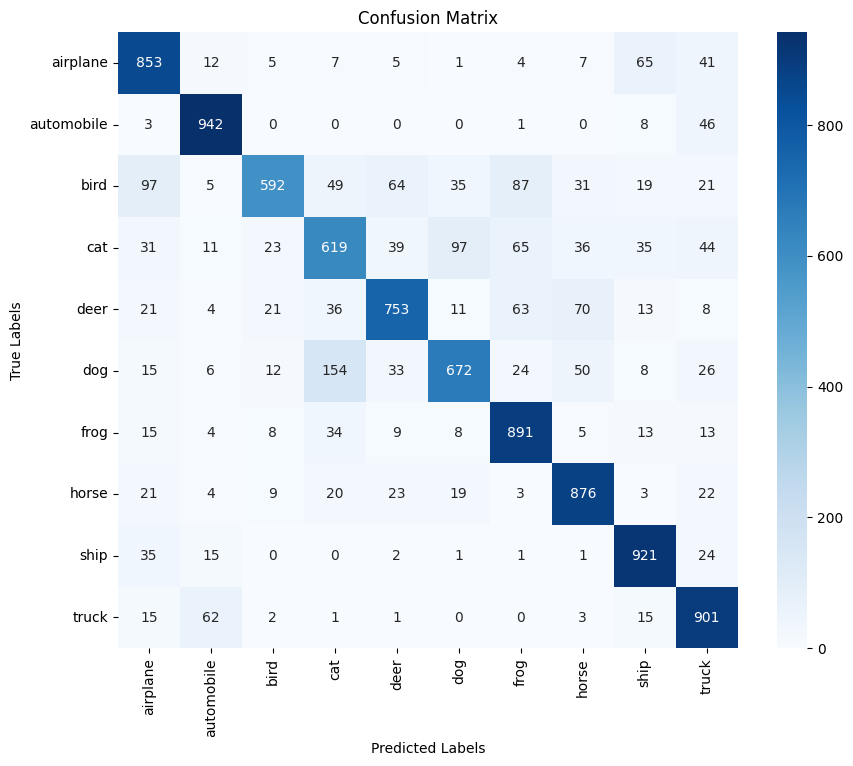

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], yticklabels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


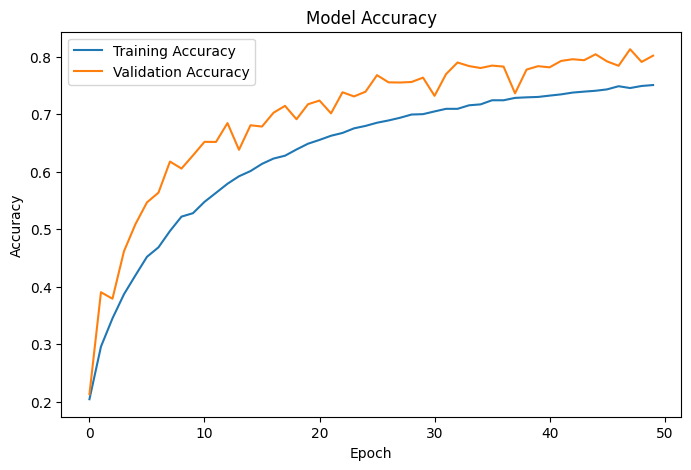

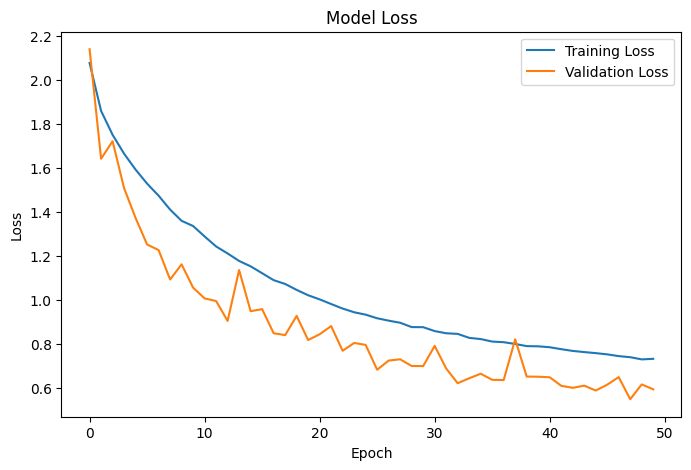

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [15]:
#saving model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)